In [34]:
!pip install kaggle

from google.colab import files
files.upload()

import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d charunisa/chatgpt-sentiment-analysis --unzip

Dataset URL: https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis
License(s): CC0-1.0


In [3]:
import pandas as pd

df = pd.read_csv('/content/file.csv')

df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [4]:
df

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [5]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["cleaned_tweets"] = df["tweets"].apply(clean_text)


In [6]:
df

,Unnamed: 0,tweets,labels,cleaned_tweets
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral,chatgpt optimizing language models for dialogue
1,1,"Try talking with ChatGPT, our new AI system wh...",good,try talking with chatgpt our new ai system whi...
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral,chatgpt optimizing language models for dialogu...
3,3,"THRILLED to share that ChatGPT, our new model ...",good,thrilled to share that chatgpt our new model o...
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad,as of minutes ago released their new chatgpt n...
...,...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad,other software projects are now trying to repl...
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good,i asked to write a joke for seos and it delive...
219291,219291,chatgpt is being disassembled until it can onl...,bad,chatgpt is being disassembled until it can onl...
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad,predictions by nothing really specific just so...


Had to install tensorflow because the module wasn't found when using TPU

In [9]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 614.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

tokenizer.fit_on_texts(df["cleaned_tweets"])

x = tokenizer.texts_to_sequences(df["cleaned_tweets"])

print(f"Tokenized sequences shape: {len(x)}")


Tokenized sequences shape: 219294


In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max([len(seq) for seq in x])
x_pad = pad_sequences(x, padding='post', maxlen=max_length)

print(f"Padded sequences shape: {x_pad.shape}")


Padded sequences shape: (219294, 61)


In [12]:
from sklearn.model_selection import train_test_split

y = df["labels"].map({"neutral": 0, "good": 1, "bad": 2})
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.2)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (175435, 61)
x_test shape: (43859, 61)
y_train shape: (175435,)
y_test shape: (43859,)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 316s 114ms/step - accuracy: 0.6426 - loss: 0.8108 - val_accuracy: 0.8457 - val_loss: 0.4435
Epoch 2/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 306s 112ms/step - accuracy: 0.8625 - loss: 0.4207 - val_accuracy: 0.8851 - val_loss: 0.3424
Epoch 3/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 304s 111ms/step - accuracy: 0.8840 - loss: 0.3553 - val_accuracy: 0.8882 - val_loss: 0.3315
Epoch 4/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 306s 112ms/step - accuracy: 0.8897 - loss: 0.3337 - val_accuracy: 0.8896 - val_loss: 0.3211
Epoch 5/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 306s 111ms/step - accuracy: 0.8949 - loss: 0.3152 - val_accuracy: 0.8925 - val_loss: 0.3257
Epoch 6/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 307s 112ms/step - accuracy: 0.8991 - loss: 0.2990 - val_accuracy: 0.8914 - val_loss: 0.3183
Epoch 7/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 306s 112ms/step - accuracy: 0.9008 - loss: 0.2892 - val_accuracy: 0.8904 - val_loss: 0.3276
Epoch 8/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 306s 111ms/step - ac

In [23]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1371/1371 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8912 - loss: 0.3358
Test Accuracy: 89.12%


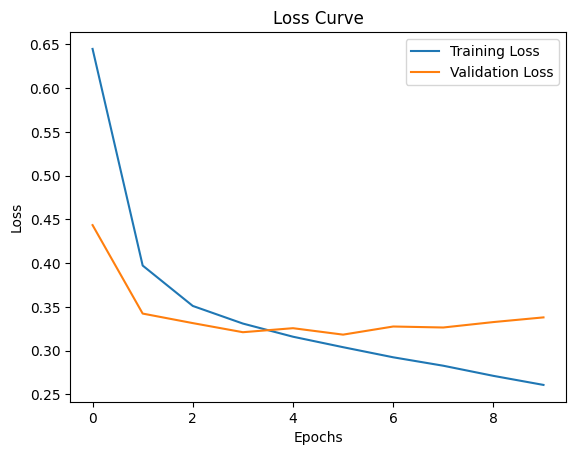

In [25]:
import matplotlib.pyplot as plt

# Plot loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

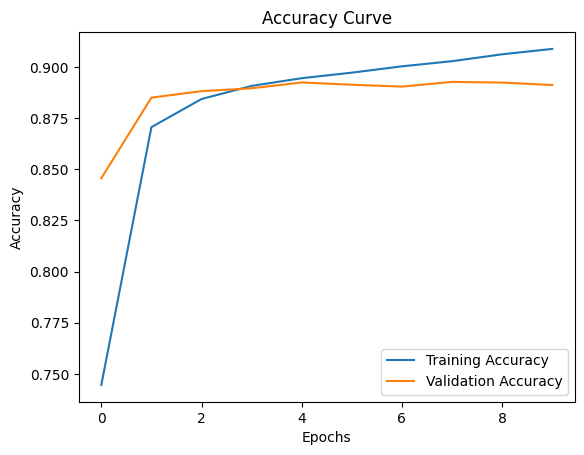

In [26]:
# Plot accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [32]:
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    seq = tokenizer.texts_to_sequences([cleaned_text])
    pad_seq = pad_sequences(seq, maxlen=max_length, padding='post')
    prediction = model.predict(pad_seq)
    sentiment = ['neutral', 'good', 'bad']
    return sentiment[prediction.argmax()]

sample_text1 = "I love using ChatGPT, it's great, and good."
print(predict_sentiment(sample_text1))
sample_text2 = "I don't like with using ChatGPT, even if i have to."
print(predict_sentiment(sample_text2))
sample_text3 = "I hate using ChatGPT, it's bad.."
print(predict_sentiment(sample_text3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
bad
